# Narrative Structure in Modernist Literature

## Aditya Bhaskar

14 August 2022

Introduction to Computational Literary Analysis

Department of Digital Humanities, University of California, Berkeley

Instructor: Jonathan Reeve

Modernism was a monumental era for art, literature, and music, emerging in the late nineteenth century and especially coming into its own after World War I. This came during a time when people started to critique and reject the way that society, government, and religion followed a norm that put less and less importance on the individual.

For literature, this meant overturning the way that stories were told. Writers now put a focus on the emotional condition of their characters, using novel writing structures to convey human feelings like never before. Modernist writers used a lot of varying sentence lengths and even stretched boundaries of traditional sentences. This required the reader to be a lot more active in reading the story, as it may be harder to follow the actions and intentions of characters. But, the emotional payoff is rewarding if one can navigate the rather abstract ideas.

Through computational analysis, I sought to find out if there was a discernible difference between the content of modernist literature and non-modernist literature. I also hoped to categorize a few titles as modernist or not modernist. To do this, I needed some parameters to set modernist works apart from ones that weren't modernist.

In [2]:
# Add all your import statements in this cell
import numpy as np
import nltk
import nltk.data
import spacy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment import SentimentIntensityAnalyzer

The first aspect of modernism I examined was sentence structure. Modernist works are said to follow a stream of consciousness technique, which includes non-traditional sentence structure. I compared the sentence structure of modernist works amongst themselves and against other works before their time. From doing this, I wanted to answer: Is there a pattern in how writers of this era form their untraditional sentences? How does this change the way emotion is conveyed through text?

In the cell below, I imported and cleaned up each work and broke them down into sentences. Then, I part-of-speech tagged each sentence to find the number of nouns, verbs, and descriptive words in the whole body of work. For descriptive words, I counted any adjectives and adverbs.


In [4]:
titles_fancy = ['The Garden Party and Other Stories', 'Dubliners', 'Mrs. Dalloway', 'Monday or Tuesday',
                'Ulysses', 'Heart of Darkness', 'The Great Gatsby', 'The Sun Also Rises',
                'Cane', 'The Good Soldier', 'Sons and Lovers','Women in Love',

                'A Christmas Carol', 'Little Women', 'Pride and Prejudice', 'The Moonstone',
                'Wuthering Heights', 'Frankenstein', 'Emma','Persuasion',
                'Great Expectations', 'The Time Machine', 'The Adventures of Tom Sawyer', 'The Adventures of Huckleberry Finn',
               
               'Dracula', 'The Strange Case of Dr. Jekyll and Mr. Hyde', "Uncle Tom's Cabin"]

titles = ['gardenparty','dubliners','dalloway','monday',
          'ulysses','darkness','gatsby','sun',
          'cane','soldier','sons','women',
          
          'christmas','littlewomen','pride','moonstone',
          'wuthering','frank','emma','persuasion',
          'great','time','tom','huckle',
         
         'dracula','jekyll','cabin']

modern = titles[:12]
notmodern = titles[12:24]

unknown = titles[24:]

join = {}.fromkeys(titles)
texts = {}.fromkeys(titles)

sentences = {}
split = {}
split2 = {}

counts = {}.fromkeys(titles)

#getting # of nouns, descriptives, verbs per book
for p in titles:
    join[p] = open(f"{p}.txt").read().replace("\n", " ")[500:];
    split[p] = nltk.word_tokenize(join[p]);
    noun = 0;
    desc = 0;
    verb = 0;
    tags = nltk.pos_tag(split[p]);
    
    for e in tags:
        if e[1] == "NN" or e[1] == "NNS" or e[1] == "NNP" or e[1] == "NNPS":
            noun = noun + 1;
        if e[1] == "JJR" or e[1] == "JJS" or e[1] == "RB" or e[1] == "RBR" or e[1] == "RBS":
            desc = desc + 1;
        if e[1] == "VB" or e[1] == "VBG" or e[1] == "VBD" or e[1] == "VBN" or e[1] == "VBP" or e[1] == "VBZ":
            verb = verb + 1;
    pospeech = [noun, desc, verb];
    counts[p] = pospeech;


My corpus consists of twelve known modernist works, twelve known non-modernist works (mostly from the mid-19th century), and three unknown works that I will try to categorize later on.

Next, I divided the total amount of nouns, verbs, and descriptive words in a story by the number of sentences to get the average number of different parts of speech per sentence. I graphed the part of speech frequencies, on the y-axis, for each title, on the x-axis.

In [6]:
join2 = {}

for m in titles:
    join2[m] = open(f"{m}.txt").read().replace("\n", " ")[500:]
    sent = len(nltk.sent_tokenize(join2[m]))
    for n in range(len(counts[m])):
        counts[m][n] = counts[m][n]/sent

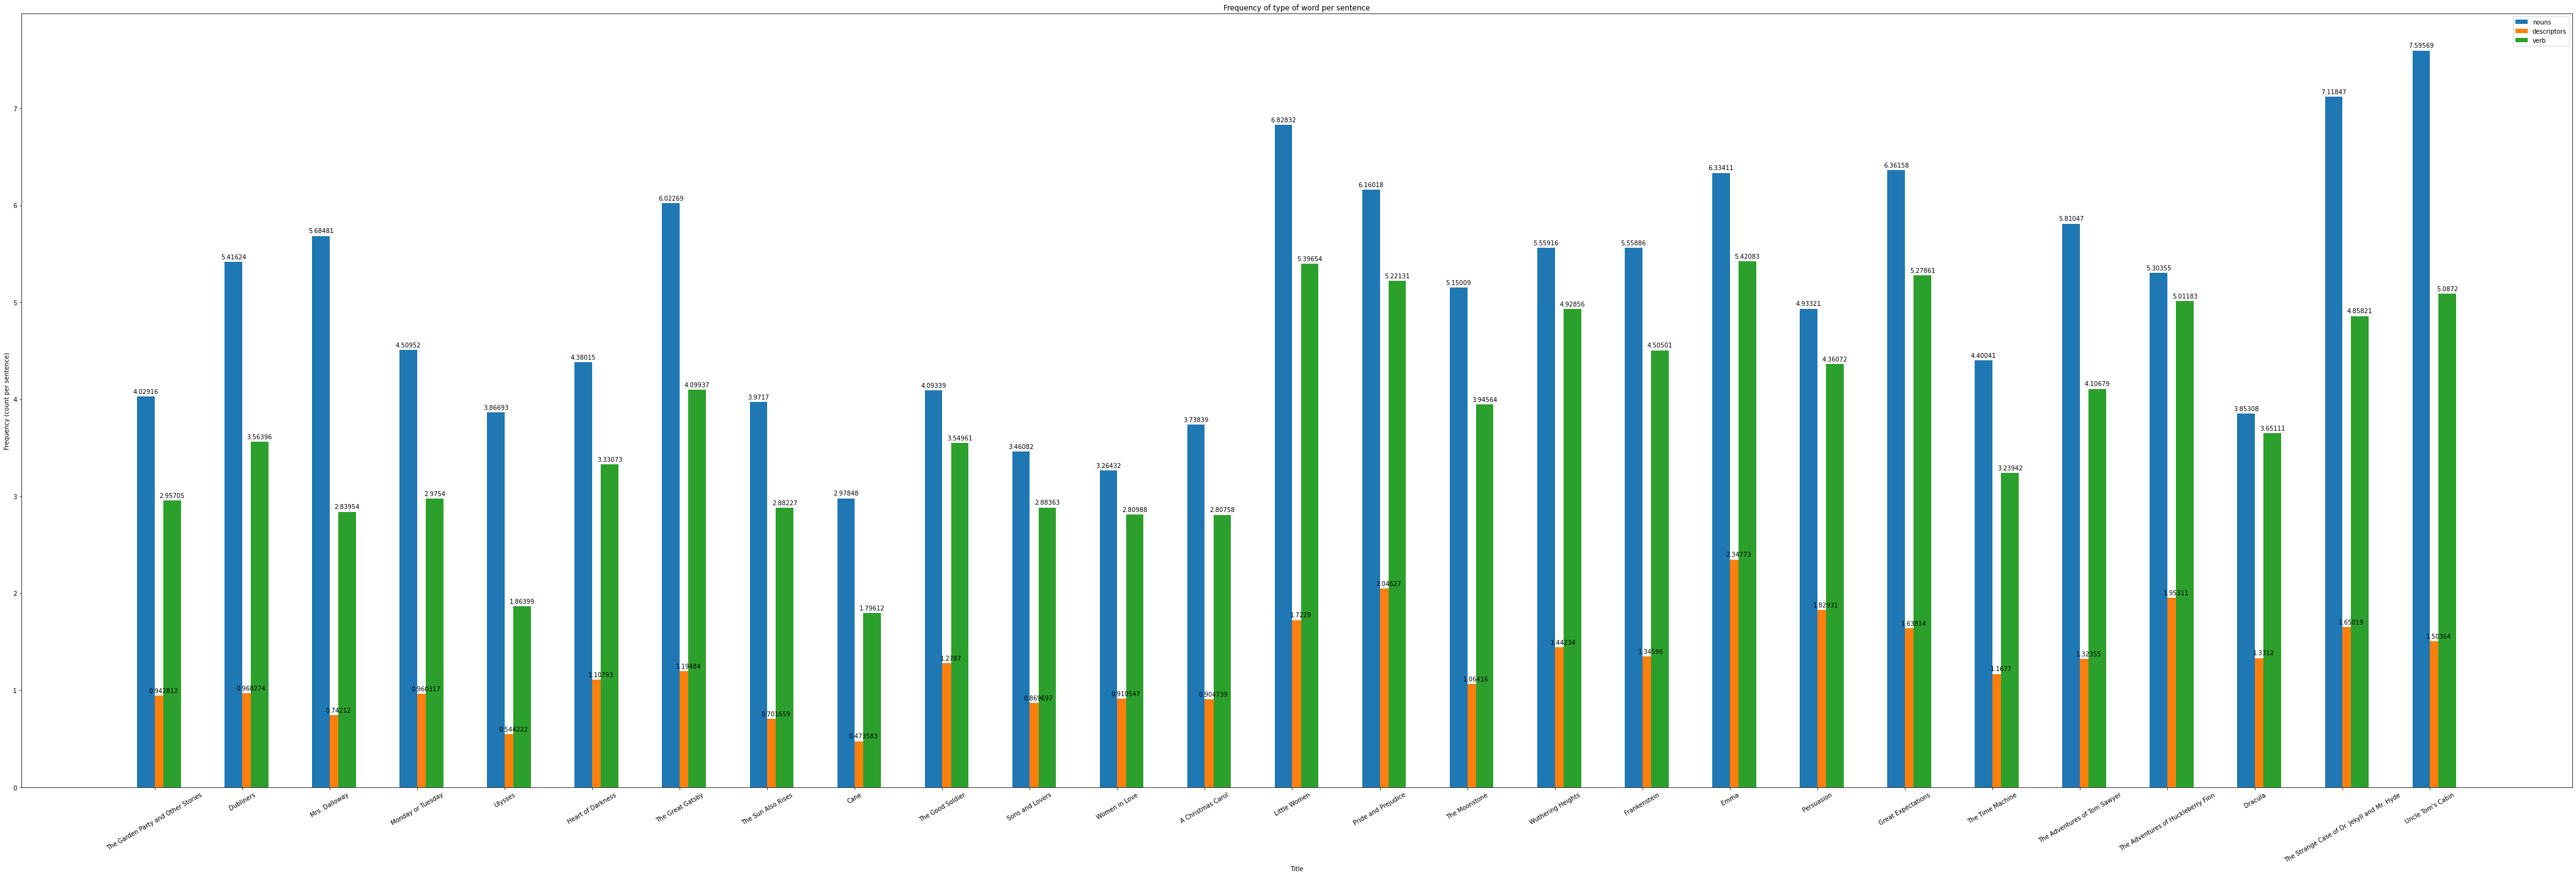

In [9]:
total = list(counts.values())
nouncount = [el[0] for el in total]
desccount = [el[1] for el in total]
verbcount = [el[2] for el in total]

x = np.arange(len(titles))  # the label locations
width = .2  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, nouncount, width, label='nouns')
rects2 = ax.bar(x + width/2, desccount, width, label='descriptors')
rects3 = ax.bar(x + width, verbcount, width, label='verb')

ax.set_xlabel('Title')
ax.set_ylabel('Frequency (count per sentence)')
ax.set_title('Frequency of type of word per sentence')
ax.set_xticks(x, titles_fancy)
plt.xticks(rotation=30)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

ax.tick_params(axis='both', labelsize=10)

plt.tight_layout(rect=(0, 0, 10, 5))
plt.show()

Above is the graph for the frequency of type of word per sentence across the books in my corpus. The modernist works are on the left side of the middle of the graph, and the non-modernist works are on the right. There's a lot of data points that crowd up the graph, but it can still tell us information about the two types of literature. The right side generally has longer bars of every color, meaning that the non-modernist works in my corpus had more words per sentence. 

This theory holds true with a lot of the short stories we've read in class, including "The Garden Party". While describing how Jose and Laura are encouraged to eat the pastries before the party, Mansfield interjects with, "Oh, impossible. Fancy cream puffs so soon after breakfast. The very idea made one shudder" (Mansfield, "The Garden Party"). This excerpt contains three very short sentences, one of which is a fragment of only two words. These sentences illustrate the stream of consciousness technique that modernist writers used to represent emotions realistically. Mansfield could have written, "It was impossible to eat fancy cream puffs so soon after breakfast; the very idea made one shudder", but this doesn't convey the emotions in the same natural way. In a way, it almost feels less human. Instead, by having a sequence of very short, simple sentences and phrases, Mansfield mimicks the human thought process while placing the reader's point of view in the mind of Laura.

In *Dubliners*, Joyce also uses short sentences to create a more animated view of the scene. in "Araby", when the boy's uncle forgets about the boy's trip to the baazar, the boy simply writes (as the narrator), "I did not smile (Joyce, "Araby"). Even though the boy is the one narrating, this quote is the only reaction we get from the boy about the situation. The shortness of the sentence places more emphasis on it, while establishing the boy as a more serious, assertive character.

Modernist writers sought to use the stream of consciousness technique to illustrate human experiences as humanly as possible in an increasingly urban, machine-driven world. This sentiment is reflected in the difference of sentence lengths for modernist works, and works that came before them.

However, it's hard to make further sense of this graph, so I made the comparison easier to see in the cell below. I counted the amount of concrete words (nouns and verbs) and descriptive words (adjectives, adverbs) per sentence for each work in the corpus. In order to deal with just one variable, I graphed the difference between concrete and descriptive words per sentence.

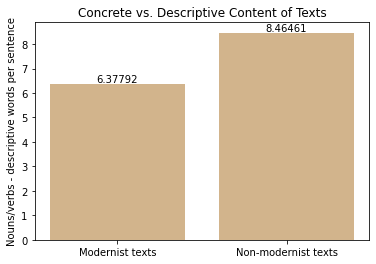

In [55]:
mod_concrete = 0
mod_desc = 0

for name in modern:
    mod_concrete = mod_concrete + counts[name][0] + counts[name][2]
    mod_desc = mod_desc + counts[name][1]
    
not_concrete = 0
not_desc = 0

for name2 in notmodern:
    not_concrete = not_concrete + counts[name2][0] + counts[name2][2]
    not_desc = not_desc + counts[name2][1]
    
    
mod_dif = (mod_concrete - mod_desc)/len(modern)
not_dif = (not_concrete - not_desc)/len(notmodern)


l = np.arange(len(labels))  # the label locations
width = .5  # the width of the bars

fig, ax = plt.subplots()

ax.bar(l, [mod_dif,not_dif], width)

ax.set_ylabel('Type of Text')
ax.set_ylabel('Nouns/verbs - descriptive words per sentence')
ax.set_title('Concrete vs. Descriptive Content of Texts')
ax.set_xticks(l, labels)


ax.tick_params(axis='both', labelsize=10)

bars = ax.bar(labels, [mod_dif,not_dif], color='tan')
ax.bar_label(bars)
plt.show()


The Concrete vs. Descriptive Content bar graph above uses the same information as the Frequency of Types of Word Types graph above, but holds a different meaning. Modernist texts had an average of 6.38 more concrete words than descriptive words per sentence. Non-modernist texts had an average of 8.46 more concrete words than descriptive words per sentence.

The plot above shows that modernist texts are generally more descriptive, or choose to use descriptive diction more often than non-modernist texts. Mansfield definitely opts to use colorful adjectives and adverbs in her writing to convey the nuanced emotions that humans feel. While describing Leila's rush of emotion during her first dance, Mansfield writes: “Her cheeks burned, she was fearfully thirsty. How sweet the ices looked on little glass plates and how cold the frosted spoon was, iced too” (Mansfield, “Her First Ball”). In this excerpt consisting of twenty-five words, seven of them (twenty-eight percent!) are adjectives or adverbs that serve to set the scene.

The amount of adjectives and adverbs directly relates to the emotional content of a story, as they give insight into the minds of characters and how they view the world. The passage above from "Her First Ball" uses a lot of descriptive imagery to convey the excitement, nervousness, and fear that Leila experiences at the dance. Mansfield directly contradicts the urgency of the thirst Leila feels ("fearfully") with the picturesqueness and purity of the refreshments being served ("sweet", "cold", "iced"). In this one small scene, we can feel what Leila is feeling while picturing the scene around us.

The language used by modernist writers leads to the second aspect of modernism that I wanted to examine: emotional content. Since modernist literature often follows the stream of consciousness narrative technique, I concluded that modernist texts would emphasize the emotions of their characters. But were the feelings conveyed by modernist writers more negative necessarily?

I performed a sentiment analysis on all the modernist books and non-modernist books in my corpus. First, I found negative and positive sentiment totals across all the books in each category which I then divided by the number of books in each category to get a single negative and positive sentiment for the two categories.

In [10]:
sentimentAnalyzer = SentimentIntensityAnalyzer()

negmod = 0
posmod = 0
neumod = 0

for r in modern:
    feels = sentimentAnalyzer.polarity_scores(join[r]);
    negmod = negmod + feels['neg'];
    posmod = posmod + feels['pos'];
    neumod = neumod + feels['neu'];

negnot = 0
posnot = 0
neunot = 0

for x in notmodern:
    feels2 = sentimentAnalyzer.polarity_scores(join[x]);
    negnot = negnot + feels2['neg'];
    posnot = posnot + feels2['pos'];
    neunot = neunot + feels2['neu'];

negnot = negnot/len(notmodern)
posnot = posnot/len(notmodern)
neunot = neunot/len(notmodern)

negmod = negmod/len(notmodern)
posmod = posmod/len(notmodern)
neumod = neumod/len(notmodern)
    
labels = ["Modernist texts", "Non-modernist texts"]
neg = [negmod, negnot]
pos = [posmod, posnot]
neu = [neumod, neunot]

In [11]:
neg, pos, neu

([0.08416666666666667, 0.09391666666666665],
 [0.11508333333333333, 0.137],
 [0.8008333333333336, 0.7694166666666665])

The dictionary above lists the negative, positive, and neutral sentiment values for modernist works in the left column, and sentiment values for non-modernist works in the right column.

Modernist works had a negative to positive sentiment ratio of .084 to .115, while non-modernist works had a ratio of .094 to .137. To make this comparison easier to see, I graphed a single value for both categories of books: negative sentiment subtracted from positive sentiment.

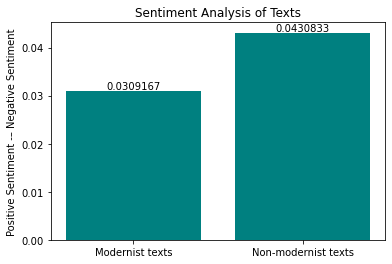

In [45]:
moddif = pos[0]-neg[0]
notdif = pos[1]-neg[1]


x = np.arange(len(labels))  # the label locations
width = .5  # the width of the bars

fig, ax = plt.subplots()

ax.bar(x, [moddif,notdif], width)

ax.set_ylabel('Type of Text')
ax.set_ylabel('Positive Sentiment -– Negative Sentiment')
ax.set_title('Sentiment Analysis of Texts')
ax.set_xticks(x, labels)


ax.tick_params(axis='both', labelsize=10)

bars = ax.bar(labels, [moddif,notdif], color="teal")
ax.bar_label(bars)

plt.show()

#print("Ratios of negative to positive words")
#print(" ")
#print("Modernist texts:", negmod/posmod)
#print("Non-modernist texts:", negnot/posnot)

The plot above clearly shows that non-modernist texts have a higher difference between positive and negative sentiment, and therefore a higher positive sentiment than modernist texts. So in general, modernist texts contain more negative diction than non-modernist texts. The texts we've read in class definitely contain dark themes and negative sentiments––death in "The Garden Party" and "Daughters of the Late Colonel", familial disconnection in "An Ideal Family" and "Marriage a la Mode", unfulfilled potential in "Araby" and "Eveline".

In the short story "Eveline", Joyce includes a lot of negative diction towards the end of the story, writing: “No! No! No! It was impossible. Her hands clutched the iron in frenzy. Amid the seas she sent a cry of anguish" (Joyce, "Eveline"). Out of the twenty-two words in this passage, seven of them have negative connotations ("no", "impossible", "frenzy", "cry", "anguish"). He repeats the phrase "No!" three times even though it's part of the narration and not someone's dialogue. By doing this, Joyce puts Eveline at the helm of the narrative; she's the one controlling how the reader feels.

Now, the question I hoped to answer was: can we categorize a written work as modernist or not modernist using sentiment analysis? I performed the same sentiment analysis on our three "unknown" stories––*Dracula*, *The Strange Case of Dr. Jekyll and Mr. Hyde*, and *Uncle Tom's Cabin*. I wanted to categorize the first two titles while using *Uncle Tom's Cabin* as a fake unknown to check if my theory held up, as it is a sentimental novel published in 1852 and not a modernist work. Printed below are the three scores (positive sentiment – negative sentiment) for each unknown novel.

In [14]:
scores = {}.fromkeys(unknown)
negun = 0
posun = 0


for q in unknown:
    feels3 = sentimentAnalyzer.polarity_scores(join[q]);
    undif = feels3['pos'] - feels3['neg'];
    scores[q] = undif;
    
scores

{'dracula': 0.023999999999999994,
 'jekyll': 0.0050000000000000044,
 'cabin': 0.036000000000000004}

First, I completed my sanity check by looking at the score for *Uncle Tom's Cabin* (1852), a decidedly non-modernist novel. It had a score of .036, which, compared to the "Sentiment Analysis of Texts" graph, places the book above the .03 level for modernist works and within the range for non-modernist works, meaning it is most likely not modernist according to my program.

Next, I focused on my true unknowns. *Dracula* (1897) had a positive-negative sentiment difference of .024, placing it in the modernist category. *Jekyll and Hyde* (1886) had a difference of only .005, easily putting it in the modernist category as well. My method is only using one aspect of stories to determine if they fall under modernism or not, so it definitely isn't as accurate as it could be. However, I wanted to examine how the sentiments of stories compared between modernist and non-modernist works to see if there was a noticeable difference in how modernist writers thought.

Modernism came at a time when artists wanted to challenge the world around them. Sianne Ngai, a cultural theorist and literary scholar, investigated the connection between modernism and the changing world, noting that "the nature of of the sociopolitcal itself has changed in a manner that both calls forth and calls up a new set of feelings" (Greenberg 1). As the world progressed during the turn of the twentieth century, the things that society required from the individual changed rapidly. Modest family businesses from last century were now growing into huge corporations that had monopolies on entire industries, enabling them to exist on a plane that was higher than any individual. Simply put, capitalism was gaining traction, and that meant individuals were becoming less and less important. Modernist writers sought to reflect this changing dynamic in their writing, creating three-dimensional characters whose interactions with the world were conveyed realistically. In a world that was becoming less and less for the individual, these writers emphasized that the experience of every person was still meaningful. Furthermore, modernist writers could use these multifaceted characters to illustrate various wrongdoings of society, or criticize where society kept its priorities. For example, "The Garden Party" used Laura's innocence and curiosity to portray the divide between social classes. Through her experience, we are introduced to two wildly different sides of society, even though they're so close to each other.

If it weren't for modernist literature, readers wouldn't be able to connect and relate with characters on a higher level because the events characters experience feel less real. These writers ushered in a new era of literature and their impact can be seen in the stories we read today.

# Bibliography

Greenberg, J. D. (2011). Modernism, Satire, and the Novel. Cambridge University Press. 

Joyce, J. (1914). Dubliners. 

Mansfield, K. (1922). The Garden Party and Other Stories.